In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('El-Nino.csv', sep = '\t')

In [3]:
data.head()

,Season,JJA,JAS,ASO,SON,OND,NDJ,DJF,JFM,FMA,MAM,AMJ,MJJ
0,1950,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8,-0.8,-0.5,-0.2,0.2,0.4,0.6
1,1951,0.7,0.9,1.0,1.2,1.0,0.8,0.5,0.4,0.3,0.3,0.2,0.0
2,1952,-0.1,0.0,0.2,0.1,0.0,0.1,0.4,0.6,0.6,0.7,0.8,0.8
3,1953,0.7,0.7,0.8,0.8,0.8,0.8,0.8,0.5,0.0,-0.4,-0.5,-0.5
4,1954,-0.6,-0.8,-0.9,-0.8,-0.7,-0.7,-0.7,-0.6,-0.7,-0.8,-0.8,-0.7


In [4]:
data.columns = ['Year','Janauary','February','March','April','May','June','July','August','September','October','November','December']

In [5]:
data.head()

,Year,Janauary,February,March,April,May,June,July,August,September,October,November,December
0,1950,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8,-0.8,-0.5,-0.2,0.2,0.4,0.6
1,1951,0.7,0.9,1.0,1.2,1.0,0.8,0.5,0.4,0.3,0.3,0.2,0.0
2,1952,-0.1,0.0,0.2,0.1,0.0,0.1,0.4,0.6,0.6,0.7,0.8,0.8
3,1953,0.7,0.7,0.8,0.8,0.8,0.8,0.8,0.5,0.0,-0.4,-0.5,-0.5
4,1954,-0.6,-0.8,-0.9,-0.8,-0.7,-0.7,-0.7,-0.6,-0.7,-0.8,-0.8,-0.7


In [6]:
data.set_index('Year', inplace = True)
data.head()

,Janauary,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
1950,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8,-0.8,-0.5,-0.2,0.2,0.4,0.6
1951,0.7,0.9,1.0,1.2,1.0,0.8,0.5,0.4,0.3,0.3,0.2,0.0
1952,-0.1,0.0,0.2,0.1,0.0,0.1,0.4,0.6,0.6,0.7,0.8,0.8
1953,0.7,0.7,0.8,0.8,0.8,0.8,0.8,0.5,0.0,-0.4,-0.5,-0.5
1954,-0.6,-0.8,-0.9,-0.8,-0.7,-0.7,-0.7,-0.6,-0.7,-0.8,-0.8,-0.7


In [7]:
data_np = data.to_numpy()
dates = pd.date_range(start='1950-01', freq='MS', periods=data_np.size)

data_np = data_np.reshape(-1, 1)
df = pd.DataFrame({'Mean': data_np.flatten()})
df.set_index(dates, inplace=True)
df.head()

,Mean
1950-01-01,-0.5
1950-02-01,-0.4
1950-03-01,-0.4
1950-04-01,-0.4
1950-05-01,-0.6


In [14]:
df1 = pd.DataFrame({'Mean': data_np.flatten()})

In [16]:
df1['date'] = dates

In [19]:
df1.date.dtype

dtype('<M8[ns]')

Text(0, 0.5, 'Mean across Month')

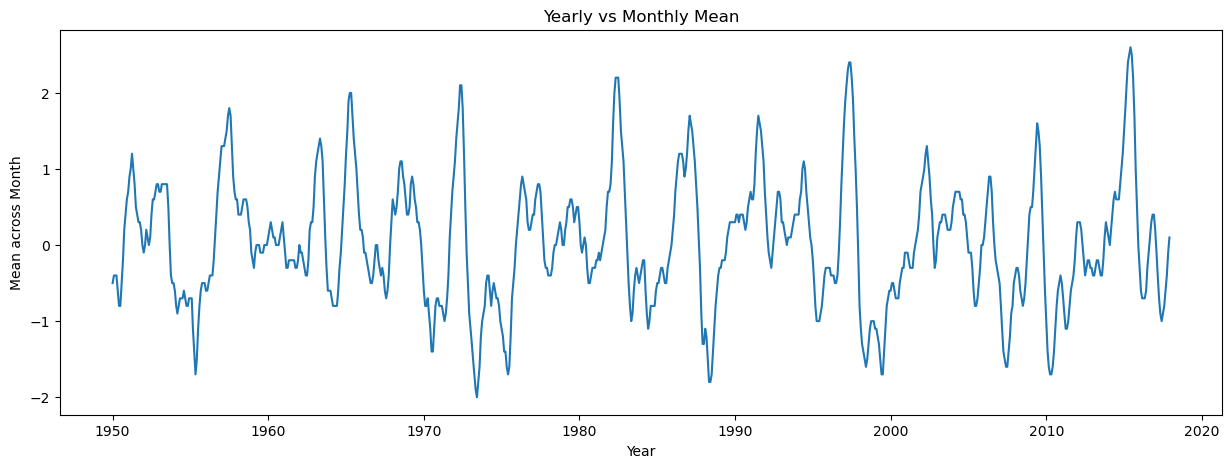

In [8]:
plt.figure(figsize = (15,5))
plt.plot(df.index, df['Mean'])
plt.title('Yearly vs Monthly Mean')
plt.xlabel('Year')
plt.ylabel('Mean across Month')

In [9]:
dataset = df.values
dataset.shape

(816, 1)

In [10]:
train = dataset[0:696,:]
test = dataset[696:,:]

In [11]:
train.shape,test.shape

((696, 1), (120, 1))

In [21]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM

In [14]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data.shape

(816, 1)

In [15]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(636, 60, 1)

In [22]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(units = 50))
model.add(Dense(1))

In [23]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(x_train, y_train, epochs=10, batch_size = 1, verbose = 2)


Epoch 1/10

636/636 - 34s - loss: 0.0152 - 34s/epoch - 53ms/step
Epoch 2/10
636/636 - 21s - loss: 0.0040 - 21s/epoch - 33ms/step
Epoch 3/10
636/636 - 22s - loss: 0.0029 - 22s/epoch - 34ms/step
Epoch 4/10
636/636 - 24s - loss: 0.0018 - 24s/epoch - 37ms/step
Epoch 5/10
636/636 - 23s - loss: 0.0012 - 23s/epoch - 36ms/step
Epoch 6/10
636/636 - 24s - loss: 0.0011 - 24s/epoch - 37ms/step
Epoch 7/10
636/636 - 26s - loss: 9.8796e-04 - 26s/epoch - 41ms/step
Epoch 8/10
636/636 - 26s - loss: 0.0010 - 26s/epoch - 41ms/step
Epoch 9/10
636/636 - 26s - loss: 0.0010 - 26s/epoch - 40ms/step
Epoch 10/10
636/636 - 26s - loss: 0.0010 - 26s/epoch - 40ms/step


In [24]:
inputs = df[len(df) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [25]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [26]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
Mean = model.predict(X_test)
Mean1 = scaler.inverse_transform(Mean)

4/4 [==============================] - 2s 30ms/step


In [27]:
rms=np.sqrt(np.mean(np.power((test-Mean1),2)))
rms

0.11875939201903983

C:\Users\HP\AppData\Local\Temp\ipykernel_19544\1009123986.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = Mean1


Text(0.5, 1.0, 'Forecasting on Actual data')

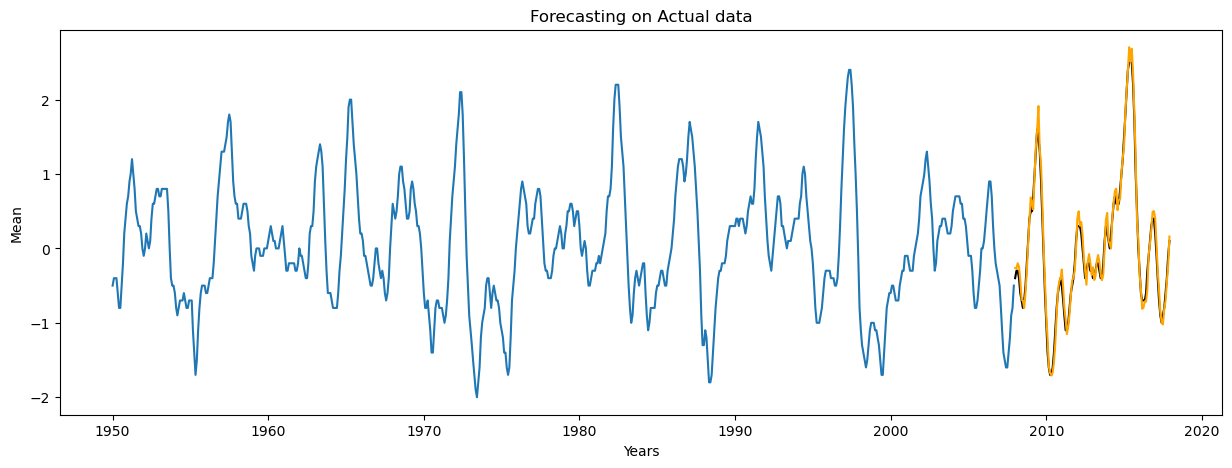

In [28]:
#plotting the train, test and forecast data
train = df[:696]
test = df[696:]
test['Predictions'] = Mean1

plt.figure(figsize=(15,5))
plt.plot(train['Mean'])
plt.plot(test['Mean'], color = 'black')
plt.plot(test['Predictions'], color = 'orange')
plt.xlabel('Years')
plt.ylabel('Mean')
plt.title('Forecasting on Actual data')

In [29]:
trainpred = model.predict(X_test,steps=2)

2/2 [==============================] - 0s 25ms/step


In [30]:
pred = scaler.inverse_transform(trainpred)

In [31]:
import math
from sklearn.metrics import mean_squared_error

In [32]:
testScore = math.sqrt(mean_squared_error(test['Mean'], trainpred[:120,0]))*100
print('Accuracy Score: %.2f' % (testScore))

Accuracy Score: 83.17


In [49]:
date_ind = pd.date_range(start = '2018-01', freq = 'MS', end = '2027-12')

In [50]:
new_df = pd.DataFrame({'Predicted_values':pred[:,0]})

In [51]:
new_df.shape

(120, 1)

In [52]:
new_df.set_index(date_ind, inplace = True)

In [53]:
new_df

,Predicted_values
2018-01-01,-0.262923
2018-02-01,-0.271012
2018-03-01,-0.199155
2018-04-01,-0.246158
2018-05-01,-0.427266
...,...
2027-08-01,-0.811379
2027-09-01,-0.703918
2027-10-01,-0.449372
2027-11-01,-0.226937


Text(0.5, 1.0, 'Forecasting on Actual data')

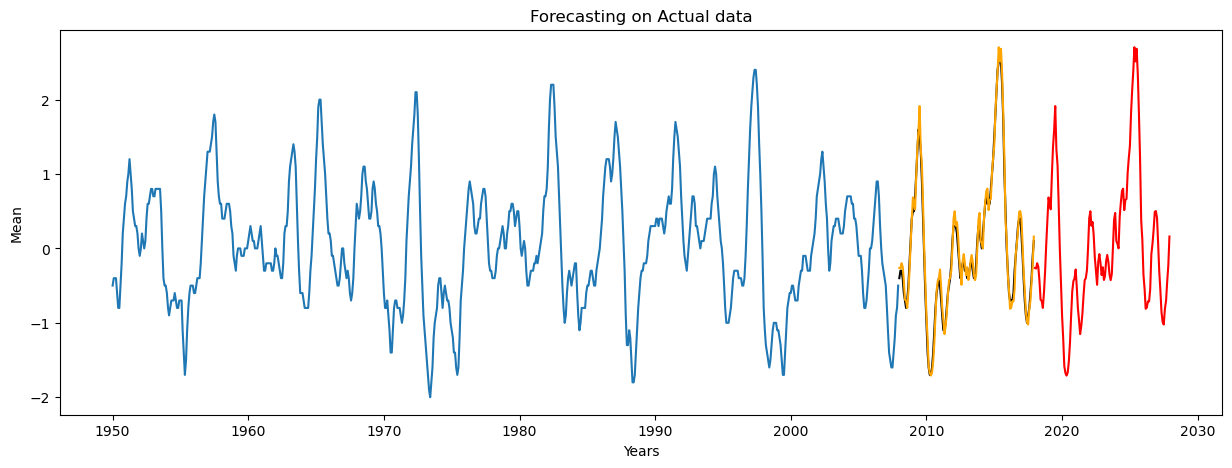

In [57]:
plt.figure(figsize=(15,5))
plt.plot(train['Mean'])
plt.plot(test['Mean'], color = 'black')
plt.plot(test['Predictions'], color = 'orange')
plt.plot(new_df['Predicted_values'], color = 'red')
plt.xlabel('Years')
plt.ylabel('Mean')
plt.title('Forecasting on Actual data')
plt.show()

In [77]:
import numpy as np

def predict_for_year(target_year, last_trained_year=2017, last_trained_month=12):
    """
    Predict values for a given target year based on the last trained year and month.
    This function assumes the input to the model is a 3D array of shape (batch_size, sequence_length, features).
    """
    # Initialize input data (this should be the last known input data used in training)
    input_data = np.array([[[0.1], [0.2], [0.3], [0.4], [0.5]]]) 

    current_year = last_trained_year
    current_month = last_trained_month
    predictions = []

    while current_year < target_year or (current_year == target_year and current_month < 12):
        # Predict the next value
        predicted_scaled_value = model.predict(input_data, verbose=0)  # Assuming model is already defined

        # Reshape the predicted value to match the shape of input_data (batch_size=1, sequence_length=1, features=1)
        predicted_scaled_value = np.reshape(predicted_scaled_value, (1, 1, 1))

        # Append the prediction to the list of predictions
        predictions.append(predicted_scaled_value[0, 0, 0])

        # Update input data with the new prediction, sliding the window forward
        input_data = np.append(input_data[:, 1:, :], predicted_scaled_value, axis=1)

        # Update the current year and month
        current_month += 1
        if current_month > 12:
            current_month = 1
            current_year += 1

    return predictions[-1]  # Return the prediction for the target year

In [86]:
target_year = 2021
predicted_value_2024 = predict_for_year(target_year)

In [88]:
print(predicted_value_2024)

if predicted_value_2024 >= 0.5 and predicted_value_2024 <= 0.9:
    print(target_year, 'is Weak El-Nino')
elif predicted_value_2024 >= 1.0 and predicted_value_2024 <= 1.4:
    print(target_year, 'is Moderate El-Nino')
elif predicted_value_2024 >= 1.5 and predicted_value_2024 <= 1.9:
    print(target_year, 'is Strong El-Nino')
elif predicted_value_2024 >= 2:
    print(target_year, 'is Very Strong El-Nino')
elif predicted_value_2024 <= -0.5 and predicted_value_2024 >= -0.9:
    print(target_year, 'is Weak La-Nina')
elif predicted_value_2024 <= -1.0 and predicted_value_2024 >= -1.4:
    print(target_year, 'is Moderate La-Nina')
elif predicted_value_2024 <= -1.5:
    print(target_year, 'is Strong La-Nina')
else:
    print(target_year, 'is a Neutral Year')  

0.5535019
2021 is Weak El-Nino


In [90]:
# Save the trained model in the recommended Keras format
model.save('my_model.keras')